# Check all MRS detector images for sensitivity limit
In this notebook we display all the MRS detector images of CAR007. In the process we also check whether the sources are visible throughout the MIRI wavelength range.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
# import modules
import funcs
import mrsobs

import glob
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
# Define paths to data
workDir    = '/Users/ioannisa/Desktop/python/miri_devel/'
mirisimDir = '/Users/ioannisa/Desktop/python/mirisim/'
dataDir    = '/Users/ioannisa/Desktop/python/mirisim/stellar_spectra/80.50863-69.5107_22-02-18_pipeversion-jwst0.9.2/'
cdpDir     = workDir+'cdp_data/'
d2cMapDir  = workDir+'notebooks/distortionMaps/'

# Get wavelength calibration pixel map
band = '1A'
d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)

# Get spectral resolution table
specres_table = funcs.get_cdps(band,cdpDir)[4]

In [7]:
obs_dirs = glob.glob(dataDir+'Obs*_MRS_*'.format(band))
sim_imgfiles = {}
for obs_dir in obs_dirs:
    directory = obs_dir.replace(dataDir,'')
    sim_imgfiles[directory] = glob.glob(obs_dir+'/det_image_seq*_MIRIFU*_*exp1_cal.fits')


0.000285425800432 8.1920679684e-05


<IPython.core.display.Javascript object>


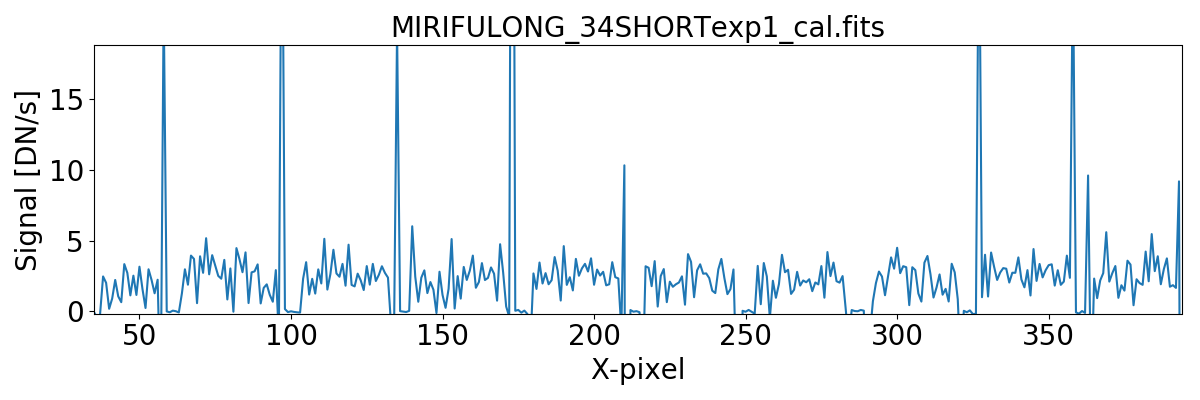

0.000285425800432 8.1920679684e-05


<IPython.core.display.Javascript object>


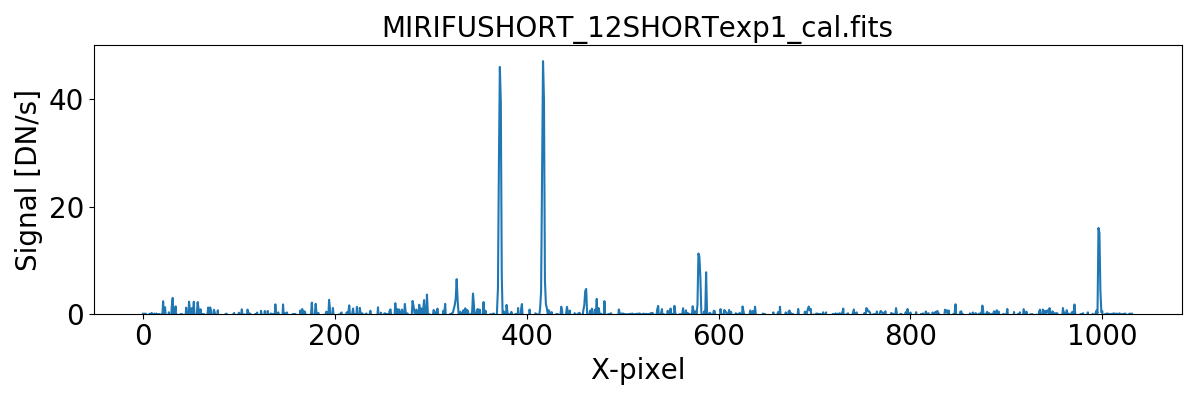

0.000285425800432 8.1920679684e-05


<IPython.core.display.Javascript object>


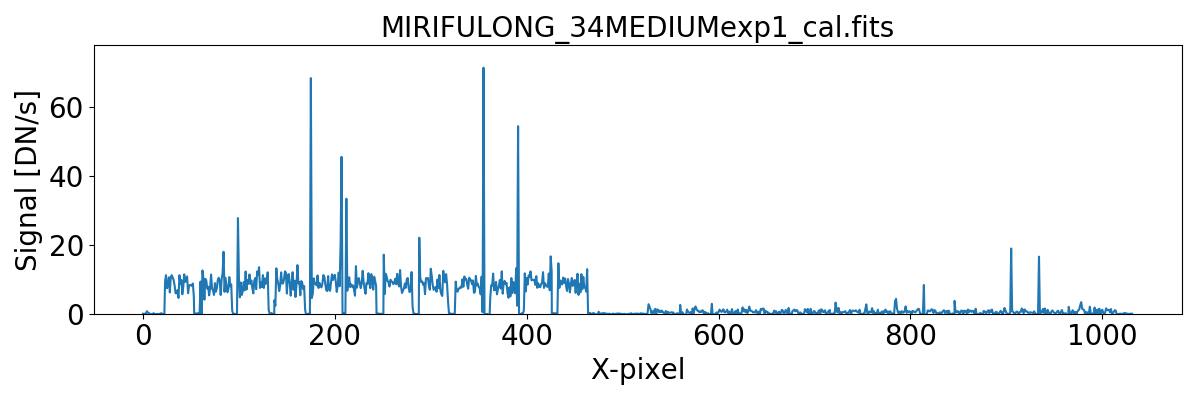

0.000285425800432 8.1920679684e-05


<IPython.core.display.Javascript object>


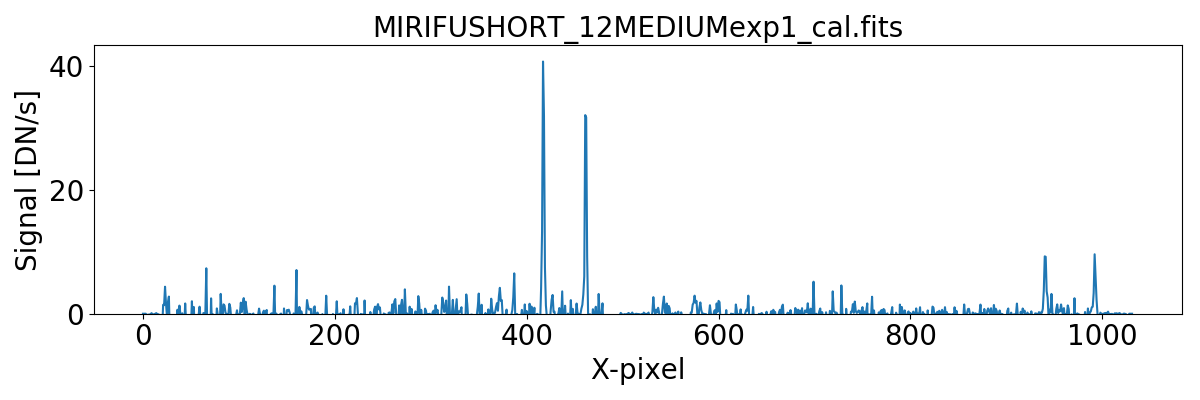

0.000538399108595 0.000114509242783


<IPython.core.display.Javascript object>


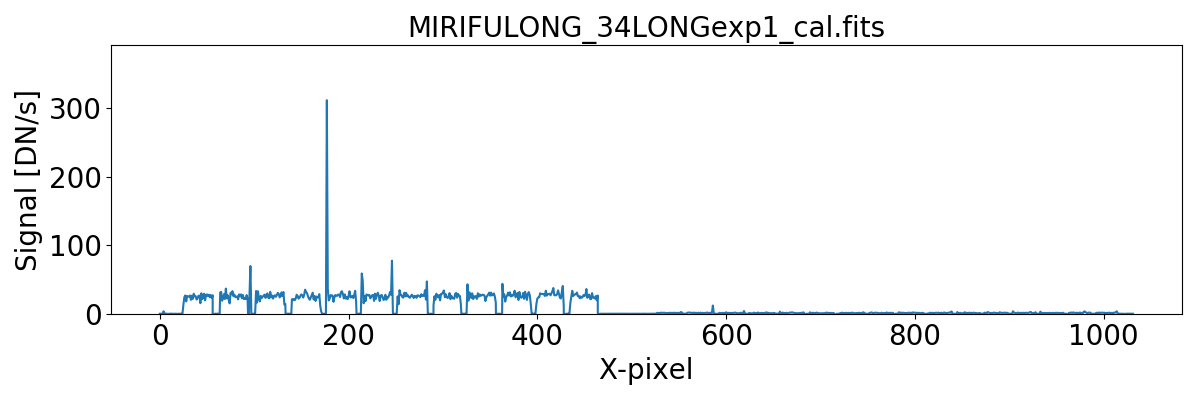

0.000538399108595 0.000114509242783


<IPython.core.display.Javascript object>


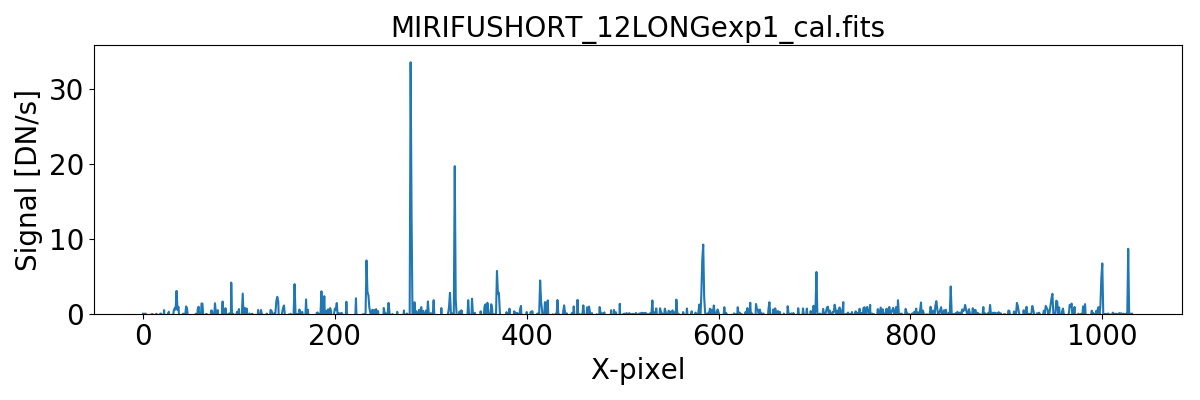

In [33]:
for obs_dir in ['Obs1_MRS_SHORT','Obs5_MRS_MEDIUM','Obs10_MRS_LONG']:
    for sim_imgfile in sim_imgfiles[obs_dir]:
        if sim_imgfile.split('_seq')[1].split('_MIRIFU')[0] == '2':
            slope_image_hdu = fits.open(sim_imgfile)
            slope_image = slope_image_hdu[1].data
            print slope_image_hdu[1].header['RA_V1'],slope_image_hdu[1].header['DEC_V1']
            plt.figure(figsize=(12,4))
            plt.title(sim_imgfile.split('/det_image_seq2_')[1])
            plt.plot(slope_image[512,:])
            plt.ylim(0)
            plt.xlabel('X-pixel')
            plt.ylabel('Signal [DN/s]')
            plt.tight_layout()

In [34]:
# Let's construct the spectral grid for the specified MRS band
lambcens,lambfwhms = funcs.spectral_gridding(band,d2cMaps,specres_table=specres_table)

In [ ]:
# FM MRS_OPT_01 (MRS FOV and Distortion Measurements)
FM_MRS_OPT_01_raster_centroid = {}
pointings = np.arange(1,64)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0)
    
    FM_MRS_OPT_01_raster_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_01_raster_centroid,'FM_MRS_OPT_01_raster_centroid',path='obj/' )

In [ ]:
# FM MRS_OPT_02 (MRS Image Quality)
FM_MRS_OPT_02_centroid = {}
pointings = np.arange(1,13)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_02_obs(lvl2path,pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0)
    
    FM_MRS_OPT_02_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_02_centroid,'FM_MRS_OPT_02_centroid',path='obj/' )

In [9]:
# FM MRS_OPT_06 (Across Slit Scans) - Left
FM_MRS_OPT_06_leftraster_centroid = {}
pointings = np.arange(1,24)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_06_raster(lvl2path,position='left',pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0)
    
    FM_MRS_OPT_06_leftraster_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_06_leftraster_centroid,'FM_MRS_OPT_06_leftraster_centroid',path='obj/' )

In [ ]:
# FM MRS_OPT_06 (Across Slit Scans) - Middle
FM_MRS_OPT_06_middleraster_centroid = {}
pointings = np.arange(1,28)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_06_raster(lvl2path,position='middle',pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0)
    
    FM_MRS_OPT_06_middleraster_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_06_middleraster_centroid,'FM_MRS_OPT_06_middleraster_centroid',path='obj/' )

In [ ]:
# FM MRS_OPT_06 (Across Slit Scans) - Right
FM_MRS_OPT_06_rightraster_centroid = {}
pointings = np.arange(1,24)
for pointing in pointings:
    key = 'P'+str(pointing)
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_06_raster(lvl2path,position='right',pointing=key)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0)
    
    FM_MRS_OPT_06_rightraster_centroid[key] = pointsource_centroid
funcs.save_obj(FM_MRS_OPT_06_rightraster_centroid,'FM_MRS_OPT_06_rightraster_centroid',path='obj/' )

In [ ]:
# CV1RR MRS_OPT_02
lvl2path  = workDir+'CV1RR_data/LVL2/'
CV1RR_MRS_OPT_02_centroid = {}
CV1RR_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,campaign='CV1RR')
pointings = CV1RR_pointings_dict.keys()
for pointing in pointings:
    print 'Pointing {}'.format(pointing)
    point_source_sci = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,campaign='CV1RR',pointing=pointing)
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_sci)
    
    pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0,campaign='CV1RR')
    
    CV1RR_MRS_OPT_02_centroid[pointing] = pointsource_centroid
funcs.save_obj(CV1RR_MRS_OPT_02_centroid,'CV1RR_MRS_OPT_02_centroid',path='obj/' )

In [ ]:
# CV2 MRS_OPT_02
from astropy.io import fits
lvl2path  = workDir+'CV2_data/LVL2/'
CV2_MRS_OPT_02_centroid = {}
CV2_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2')
pointings = CV2_pointings_dict.keys()
for pointing in pointings:
    key = pointing.split('_')[1]
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = fits.open(lvl2path+CV2_pointings_dict[pointing][1])[0].data[0,:,:],fits.open(lvl2path+CV2_pointings_dict[pointing][3])[0].data[0,:,:]
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0)
    
    CV2_MRS_OPT_02_centroid[key] = pointsource_centroid
funcs.save_obj(CV2_MRS_OPT_02_centroid,'CV2_MRS_OPT_02_centroid',path='obj/' )

In [ ]:
# CV3 MRS_OPT_02
from astropy.io import fits
lvl2path  = workDir+'CV3_data/LVL2/'
CV3_MRS_OPT_02_centroid = {}
CV3_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,campaign='CV3')
pointings = CV3_pointings_dict.keys()
for pointing in pointings:
    key = pointing.split('_')[1]
    print 'Pointing {}'.format(key)
    point_source_sci,point_source_bkg = fits.open(lvl2path+CV3_pointings_dict[pointing][1])[0].data[0,:,:],fits.open(lvl2path+CV3_pointings_dict[pointing][3])[0].data[0,:,:]
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)
    
    pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0)
    
    CV3_MRS_OPT_02_centroid[key] = pointsource_centroid
funcs.save_obj(CV3_MRS_OPT_02_centroid,'CV3_MRS_OPT_02_centroid',path='obj/' )

## Visualization

In [2]:
# load all centroids
FM_MRS_OPT_01_raster_centroid       = funcs.load_obj('FM_MRS_OPT_01_raster_centroid',path='obj/')
FM_MRS_OPT_02_centroid              = funcs.load_obj('FM_MRS_OPT_02_centroid',path='obj/')
FM_MRS_OPT_06_leftraster_centroid   = funcs.load_obj('FM_MRS_OPT_06_leftraster_centroid',path='obj/')
FM_MRS_OPT_06_middleraster_centroid = funcs.load_obj('FM_MRS_OPT_06_middleraster_centroid',path='obj/')
FM_MRS_OPT_06_rightraster_centroid  = funcs.load_obj('FM_MRS_OPT_06_rightraster_centroid',path='obj/')
CV1RR_MRS_OPT_02_centroid           = funcs.load_obj('CV1RR_MRS_OPT_02_centroid',path='obj/')
CV2_MRS_OPT_02_centroid             = funcs.load_obj('CV2_MRS_OPT_02_centroid',path='obj/')
CV3_MRS_OPT_02_centroid             = funcs.load_obj('CV3_MRS_OPT_02_centroid',path='obj/')

<IPython.core.display.Javascript object>


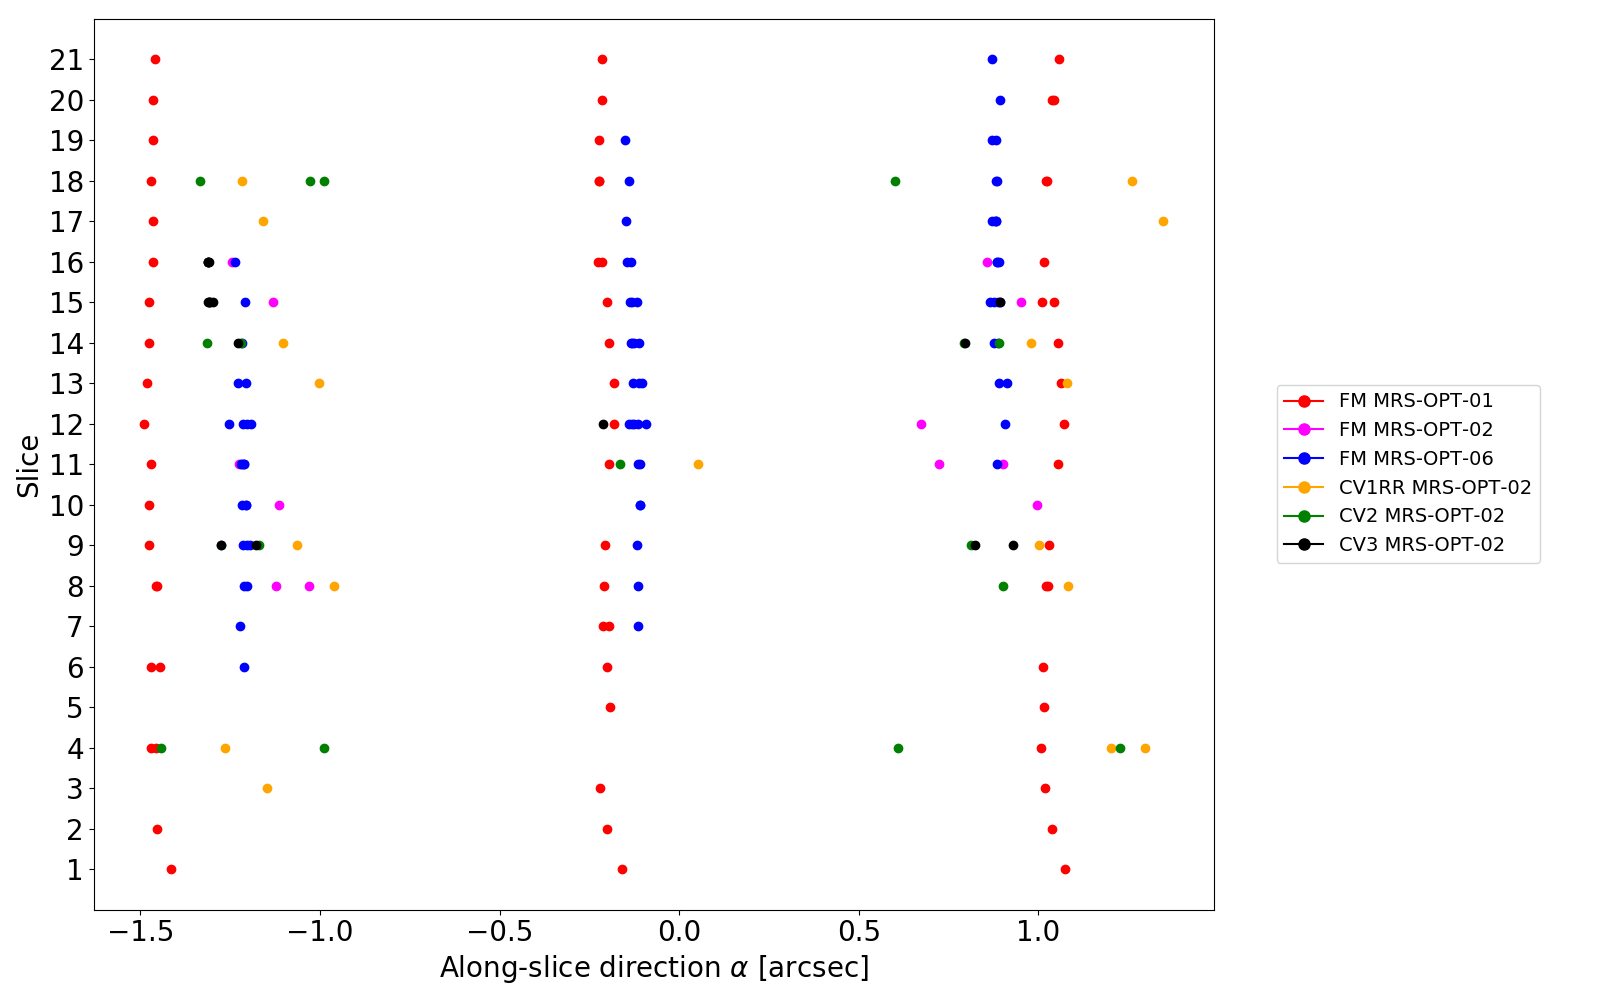

In [7]:
plt.figure(figsize=(16,10))
for pointing in FM_MRS_OPT_01_raster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_01_raster_centroid[key][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[key][2])]),FM_MRS_OPT_01_raster_centroid[key][0],'ro')
for pointing in FM_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_02_centroid[key][2][~np.isnan(FM_MRS_OPT_02_centroid[key][2])]),FM_MRS_OPT_02_centroid[key][0],'o',color='magenta')
for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_leftraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[key][2])]),FM_MRS_OPT_06_leftraster_centroid[key][0],'bo')
for pointing in FM_MRS_OPT_06_middleraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_middleraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[key][2])]),FM_MRS_OPT_06_middleraster_centroid[key][0],'bo')
for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_rightraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[key][2])]),FM_MRS_OPT_06_rightraster_centroid[key][0],'bo')
for pointing in CV1RR_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV1RR_MRS_OPT_02_centroid[key][2][~np.isnan(CV1RR_MRS_OPT_02_centroid[key][2])]),CV1RR_MRS_OPT_02_centroid[key][0],'o',color='orange')
for pointing in CV2_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV2_MRS_OPT_02_centroid[key][2][~np.isnan(CV2_MRS_OPT_02_centroid[key][2])]),CV2_MRS_OPT_02_centroid[key][0],'go')
for pointing in CV3_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV3_MRS_OPT_02_centroid[key][2][~np.isnan(CV3_MRS_OPT_02_centroid[key][2])]),CV3_MRS_OPT_02_centroid[key][0],'ko')
tickmarks = np.arange(1,22).astype(int)
plt.yticks(tickmarks)
plt.xlabel(r'Along-slice direction $\alpha$ [arcsec]')
plt.ylabel('Slice')
legend_elements = [Line2D([0],[0],marker='o',color='r',label='FM MRS-OPT-01',markerfacecolor='r',markersize=8),
                   Line2D([0],[0],marker='o',color='magenta',label='FM MRS-OPT-02',markerfacecolor='magenta',markersize=8),
                   Line2D([0],[0],marker='o',color='b',label='FM MRS-OPT-06',markerfacecolor='b',markersize=8),
                   Line2D([0],[0],marker='o',color='orange',label='CV1RR MRS-OPT-02',markerfacecolor='orange',markersize=8),
                   Line2D([0],[0],marker='o',color='g',label='CV2 MRS-OPT-02',markerfacecolor='g',markersize=8),
                   Line2D([0],[0],marker='o',color='k',label='CV3 MRS-OPT-02',markerfacecolor='k',markersize=8)]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.3,0.6))
plt.tight_layout(rect=[0,0,0.77,1])

In [11]:
%matplotlib inline
for ibin in range(470,len(lambcens)-30):
    plt.figure(figsize=(16,10))
    for pointing in FM_MRS_OPT_01_raster_centroid.keys():
        key = pointing
        plt.plot(FM_MRS_OPT_01_raster_centroid[key][2][ibin],FM_MRS_OPT_01_raster_centroid[key][0],'ro')
    for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():
        key = pointing
        plt.plot(FM_MRS_OPT_06_leftraster_centroid[key][2][ibin],FM_MRS_OPT_06_leftraster_centroid[key][0],'bo')
    for pointing in FM_MRS_OPT_06_middleraster_centroid.keys():
        key = pointing
        plt.plot(FM_MRS_OPT_06_middleraster_centroid[key][2][ibin],FM_MRS_OPT_06_middleraster_centroid[key][0],'bo')
    for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():
        key = pointing
        plt.plot(FM_MRS_OPT_06_rightraster_centroid[key][2][ibin],FM_MRS_OPT_06_rightraster_centroid[key][0],'bo')
    plt.xlim(-1.7,1.7)
    tickmarks = np.arange(1,22).astype(int)
    plt.yticks(tickmarks)
    plt.xlabel(r'Along-slice direction $\alpha$ [arcsec]')
    plt.ylabel('Slice')
    legend_elements = [Line2D([0],[0],marker='o',color='r',label='FM MRS-OPT-01',markerfacecolor='r',markersize=8),
                       Line2D([0],[0],marker='o',color='b',label='FM MRS-OPT-06',markerfacecolor='b',markersize=8)]
    plt.legend(handles=legend_elements,bbox_to_anchor=(1.3,0.6))
    plt.tight_layout(rect=[0,0,0.77,1])
    plt.savefig('/Users/ioannisa/Desktop/figures/ibin{}'.format(ibin))
    plt.close()